In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
data_cluster = pd.read_csv('data_cluster.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
data_cluster.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
1,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
2,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0.0,5.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,0.0,3.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
4,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0.0,6.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


### 50대 남자 Cluster

In [3]:
cluster = data_cluster.loc[(data_cluster['GENDER_M'] == 1) & (data_cluster['CLNT_AGE'] == 50)]
cluster = cluster.drop(['GENDER_F','GENDER_M','CLNT_AGE'], axis=1)
print(cluster.shape)
cluster.head()

(7741, 40)


,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
119,132.400000,19900.000000,1.1,151.800000,1487.700000,0.0,10.0,0,0.0,0.0,...,0,1,0,0.0,0.0,0,0,3.0,5.0,1.0
155,74.600000,12760.000000,1.4,68.400000,618.000000,0.0,5.0,0,0.0,0.0,...,0,0,3,0.0,1.0,0,0,0.0,1.0,0.0
161,90.000000,282500.000000,1.0,123.000000,1306.500000,0.0,2.0,0,0.0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,1.0,1.0
245,77.666667,117200.000000,1.0,88.666667,1304.333333,0.0,3.0,0,0.0,0.0,...,0,0,0,3.0,0.0,0,0,0.0,0.0,0.0
276,62.000000,149933.333333,1.0,65.666667,958.333333,0.0,3.0,0,0.0,0.0,...,0,0,0,1.0,2.0,0,0,0.0,0.0,0.0


In [4]:
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
cluster_drop.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9'],
      dtype='object')

In [157]:
cluster_drop.head() 

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
119,132.400000,19900.000000,1.1,151.800000,1487.700000,0.0,10.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
155,74.600000,12760.000000,1.4,68.400000,618.000000,0.0,5.0,0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
161,90.000000,282500.000000,1.0,123.000000,1306.500000,0.0,2.0,0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
245,77.666667,117200.000000,1.0,88.666667,1304.333333,0.0,3.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
276,62.000000,149933.333333,1.0,65.666667,958.333333,0.0,3.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [16]:
# 기본 스케일. 평균과 표준편차 사용
pd.DataFrame(scale(cluster_drop)).head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.129871,-0.354723,-0.079807,1.012803,0.007508,-0.025013,0.348156,-0.063729,-0.200214,-0.053506,...,-0.091917,-0.081064,-0.148591,-0.077689,-0.293206,-0.368178,-0.365837,-0.301335,-0.350339,3.827881
1,0.101688,-0.400961,0.121489,-0.244685,-0.739420,-0.025013,-0.070022,-0.063729,-0.200214,-0.053506,...,-0.091917,-0.081064,0.278057,-0.077689,-0.293206,-0.368178,-0.365837,-0.301335,-0.350339,1.746219
2,0.375633,1.345865,-0.146906,0.578563,-0.148113,-0.025013,-0.320929,-0.063729,-0.200214,-0.053506,...,-0.091917,-0.081064,-0.041929,-0.077689,-0.293206,-0.368178,-0.365837,-0.301335,-0.350339,0.497222
3,0.156240,0.275389,-0.146906,0.060892,-0.149974,-0.025013,-0.237294,-0.063729,-0.200214,-0.053506,...,-0.091917,-0.081064,-0.148591,-0.077689,-0.293206,-0.368178,-0.365837,-0.301335,-0.350339,0.913554
4,-0.122449,0.487369,-0.146906,-0.285898,-0.447130,-0.025013,-0.237294,-0.063729,-0.200214,-0.053506,...,-0.091917,-0.081064,-0.255253,-0.077689,-0.012545,0.301244,-0.365837,-0.301335,-0.350339,-0.335443


In [31]:
# 중앙값과 IQR 사용. 아웃라이어의 영향을 최소화
pd.DataFrame(robust_scale(cluster_drop)).head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.443636,-0.363687,0.1,1.248309,0.240564,0.0,1.75,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.392727,-0.496648,0.4,0.039614,-0.440486,0.0,0.50,0.0,0.0,0.0,...,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.672727,4.526443,0.0,0.830918,0.098669,0.0,-0.25,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.448485,1.448231,0.0,0.333333,0.096972,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.163636,2.057790,0.0,0.000000,-0.173975,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [14]:
# 최대/최소값이 각각 1, 0이 되도록 스케일링
pd.DataFrame(minmax_scale(cluster_drop)).head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.266122,0.006305,0.001266,0.301408,0.117623,0.0,0.015129,0.0,0.0,0.0,...,0.0,0.0,0.001513,0.0,0.000000,0.000000,0.0,0.0,0.0,0.121951
1,0.148163,0.003986,0.005063,0.133602,0.047924,0.0,0.007564,0.0,0.0,0.0,...,0.0,0.0,0.007564,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060976
2,0.179592,0.091607,0.000000,0.243461,0.103101,0.0,0.003026,0.0,0.0,0.0,...,0.0,0.0,0.003026,0.0,0.000000,0.000000,0.0,0.0,0.0,0.024390
3,0.154422,0.037912,0.000000,0.174380,0.102928,0.0,0.004539,0.0,0.0,0.0,...,0.0,0.0,0.001513,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036585
4,0.122449,0.048545,0.000000,0.128102,0.075199,0.0,0.004539,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.005376,0.023256,0.0,0.0,0.0,0.000000


In [15]:
# 최대절대값과 0이 각각 1, 0이 되도록 스케일링
pd.DataFrame(maxabs_scale(cluster_drop)).head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.269106,0.006463,0.01375,0.304208,0.119035,0.0,0.015129,0.0,0.0,0.0,...,0.0,0.0,0.001513,0.0,0.000000,0.000000,0.0,0.0,0.0,0.121951
1,0.151626,0.004144,0.01750,0.137074,0.049448,0.0,0.007564,0.0,0.0,0.0,...,0.0,0.0,0.007564,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060976
2,0.182927,0.091752,0.01250,0.246493,0.104537,0.0,0.003026,0.0,0.0,0.0,...,0.0,0.0,0.003026,0.0,0.000000,0.000000,0.0,0.0,0.0,0.024390
3,0.157859,0.038065,0.01250,0.177689,0.104363,0.0,0.004539,0.0,0.0,0.0,...,0.0,0.0,0.001513,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036585
4,0.126016,0.048696,0.01250,0.131597,0.076679,0.0,0.004539,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.005376,0.023256,0.0,0.0,0.0,0.000000


In [5]:
mms = MinMaxScaler()
mms.fit(cluster_drop) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster_drop)

### Choosing the Number of Clusters : Elbow Method

In [191]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)

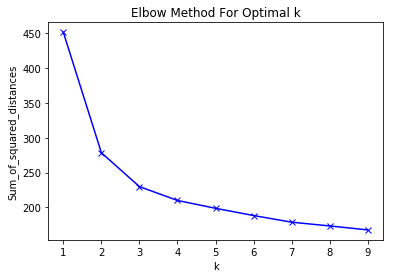

In [192]:
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출
km_predict = pd.DataFrame(km.predict(cluster_transformed)) # 학습된 모델이 맞춰 라벨 리턴
km_predict.columns = ['predict']
km_predict.head()

,predict
0,0
1,1
2,0
3,0
4,1


In [7]:
cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster_drop.columns
cluster_transformed.index = cluster.index
cluster_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
119,0.266122,0.006305,0.001266,0.301408,0.117623,0.0,0.015129,0.0,0.0,0.0,...,0.0,0.0,0.001513,0.0,0.000000,0.000000,0.0,0.0,0.0,0.121951
155,0.148163,0.003986,0.005063,0.133602,0.047924,0.0,0.007564,0.0,0.0,0.0,...,0.0,0.0,0.007564,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060976
161,0.179592,0.091607,0.000000,0.243461,0.103101,0.0,0.003026,0.0,0.0,0.0,...,0.0,0.0,0.003026,0.0,0.000000,0.000000,0.0,0.0,0.0,0.024390
245,0.154422,0.037912,0.000000,0.174380,0.102928,0.0,0.004539,0.0,0.0,0.0,...,0.0,0.0,0.001513,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036585
276,0.122449,0.048545,0.000000,0.128102,0.075199,0.0,0.004539,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.005376,0.023256,0.0,0.0,0.0,0.000000


In [8]:
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed['predict'].value_counts()

1    4900
0    2276
2     565
Name: predict, dtype: int64

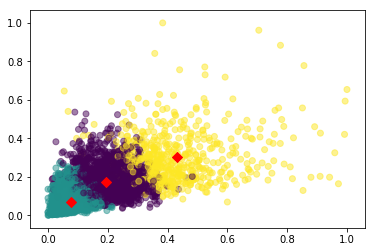

In [9]:
var1 = 'HITS_SEQ'
var2 = 'TOT_SESS_HR_V'
plt.scatter(cluster_transformed[var1],cluster_transformed[var2],c=cluster_transformed['predict'],alpha=0.5)
centers = pd.DataFrame(km.cluster_centers_,columns=cluster_drop.columns[:30])
center_x = centers[var1]
center_y = centers[var2]
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [10]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

In [11]:
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

In [12]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0     1314.0
CLAC0_1     1712.0
CLAC0_2     1106.0
CLAC0_3    11627.0
CLAC0_4     3553.0
CLAC0_5      109.0
CLAC0_6     1028.0
CLAC0_7     2760.0
CLAC0_8    18496.0
CLAC0_9     4225.0
dtype: float64

In [15]:
clutering = pd.concat([sum0,sum1,sum2],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,labels
CLAC0_0,641.0,579.0,94.0,furniture
CLAC0_1,696.0,916.0,100.0,electronic
CLAC0_2,392.0,631.0,83.0,pet
CLAC0_3,5263.0,5448.0,916.0,sports
CLAC0_4,1339.0,1990.0,224.0,food
CLAC0_5,26.0,81.0,2.0,travel
CLAC0_6,428.0,391.0,209.0,baby
CLAC0_7,1430.0,1183.0,147.0,kitchen
CLAC0_8,8936.0,7708.0,1852.0,fashion
CLAC0_9,1797.0,2142.0,286.0,beauty


<BarContainer object of 10 artists>

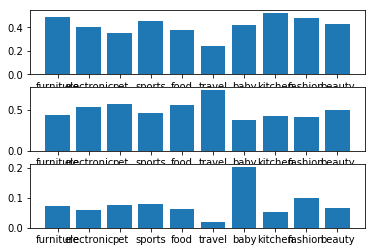

In [14]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum_of_sum)

<BarContainer object of 10 artists>

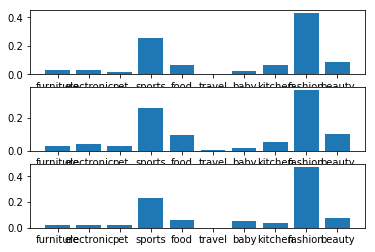

In [16]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum2.sum())

### predict by clustering score 

In [18]:
def clustering_score(k, new_data, data, transformed_data, category) :
    category_rate = np.empty([3,10])
    
    for i in range(k) :
        idx=np.where(cluster_transformed['predict']==i)
        clustering = data.loc[data.index[idx]]
        sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[i] = (clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum())/sum_of_sum
    
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))

    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]

    return sum(result)

In [64]:
def clustering_score2(k, new_data, data, transformed_data, category) :
    
    category_rate = np.empty([3,10])
    for i in range(k) :
        idx=np.where(cluster_transformed['predict']==i)
        clustering = data.loc[data.index[idx]]
        sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[i] = (clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum())/sum_of_sum
    
    diatance_from_centers = [0] * k
    for i in range(k) :
        idx=np.where(cluster_transformed['predict']==i)
        clustering = transformed_data.loc[transformed_data.index[idx], :"month_9"]
        d = []
        for j in range(clustering.shape[0]) :
            d.append( np.sqrt(sum((clustering.iloc[j] - new_data)**2)) )
        diatance_from_centers[i] = sum(d)/clustering.shape[0]

    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]

    return sum(result)

In [66]:
# cluster center와의 거리로
random_idx = cluster_transformed.index[random.randint(0,len(cluster_transformed))]
random_data = cluster_transformed.loc[random_idx, :"month_9"]

score = []
for i in range(10) :
    s = clustering_score(3, random_data, cluster, cluster_transformed, i)*100
    score.append(round(s,2))
actual = list(cluster.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
pd.DataFrame({'category': labels,'score':score,'actual_buy':actual}).sort_values(['score'],ascending=False)

,category,score,actual_buy
8,fashion,311.36,1.0
3,sports,204.22,1.0
9,beauty,76.31,5.0
4,food,66.25,0.0
7,kitchen,48.02,0.0
1,electronic,31.56,1.0
0,furniture,22.79,0.0
2,pet,20.62,0.0
6,baby,15.92,0.0
5,travel,2.28,0.0


In [67]:
# cluster의 모든 점들의 거리 평균으로

#random_idx = cluster_transformed.index[random.randint(0,len(cluster_transformed))]
#random_data = cluster_transformed.loc[random_idx, :"month_9"]

score = []
for i in range(10) :
    s = clustering_score2(3, random_data, cluster, cluster_transformed, i)*100
    score.append(round(s,2))
actual = list(cluster.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
pd.DataFrame({'category': labels,'score':score,'actual_buy':actual}).sort_values(['score'],ascending=False)

,category,score,actual_buy
8,fashion,218.22,1.0
3,sports,142.85,1.0
9,beauty,53.33,5.0
4,food,46.28,0.0
7,kitchen,33.52,0.0
1,electronic,22.04,1.0
0,furniture,15.94,0.0
2,pet,14.41,0.0
6,baby,11.27,0.0
5,travel,1.59,0.0


In [81]:
transformed_drop = cluster_transformed.drop(['predict'], axis = 1)

In [93]:
score_data = np.empty([transformed_drop.shape[0],10])

In [94]:
for i in range(len(labels)) :
    for j in range(transformed_drop.shape[0]) : 
        score_data[j,i] = clustering_score(3, transformed_drop.iloc[j], cluster, cluster_transformed, i)*100

In [97]:
score_data = pd.DataFrame(score_data)
score_data.columns = labels
score_data.head()

,furniture,electronic,pet,sports,food,travel,baby,kitchen,fashion,beauty
0,12.247678,15.213071,9.503425,106.098213,30.988665,0.871465,9.101874,26.210677,171.614933,37.952851
1,19.867597,27.467256,17.942094,177.965427,57.649520,1.980265,13.944548,41.837048,271.675821,66.447420
2,19.949822,24.755255,15.322481,172.036134,50.247717,1.421324,14.115829,43.011007,276.954648,61.648199
3,22.330378,29.177452,18.532552,195.930370,60.191761,1.886529,15.645224,47.665034,307.490487,71.623871
4,25.428194,36.053304,23.797804,229.772267,76.186722,2.715975,17.691627,53.280237,345.951390,86.636840


In [98]:
score_data.mean()

furniture      20.770585
electronic     28.882121
pet            18.931912
sports        186.531547
food           60.738736
travel          2.102885
baby           14.654809
kitchen        43.643496
fashion       284.085271
beauty         69.781316
dtype: float64

In [99]:
score_data.max()

furniture      62.836190
electronic     96.061975
pet            65.353772
sports        583.704630
food          206.993820
travel          8.115406
baby           42.915668
kitchen       129.420140
fashion       842.716121
beauty        226.512782
dtype: float64

In [127]:
labels_name = np.array(labels)
stats = score_data.loc[0,labels_name].values

In [128]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

angles=np.linspace(0, 2*np.pi, len(labels_name), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

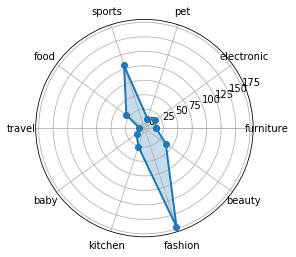

In [129]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title([score_data.loc[119,"Name"]])
ax.grid(True)

In [121]:
cluster.loc[119,'CLAC0_0':'CLAC0_9'].values

array([0., 1., 0., 0., 0., 0., 0., 3., 5., 1.])

In [123]:
labels

['furniture',
 'electronic',
 'pet',
 'sports',
 'food',
 'travel',
 'baby',
 'kitchen',
 'fashion',
 'beauty']

In [130]:
np.log(2)

0.6931471805599453